# 🚀 Salary Prediction using Random Forest Regression

## 📋 Table of Contents
1. [Project Overview](#project-overview)
2. [Data Understanding](#data-understanding)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Model Development](#model-development)

## 🎯 Project Overview

This project analyzes the relationship between years of experience and salary data to build predictive models. We implement and compare multiple machine learning approaches including Linear Regression, Decision Tree, and Random Forest algorithms.

### Business Problem
How can we accurately predict salaries based on years of experience to assist with:
- Salary negotiations
- HR planning
- Budget forecasting

### Objectives
- Build predictive models for salary estimation
- Compare different modeling approaches
- Create a reusable prediction system

## 📊 Data Understanding

First, let's import our required libraries and load the data:

In [14]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Upload the dataset
print("Please upload your dataset file.")
uploaded = files.upload()

# Load the data
data = pd.read_csv('salary data.csv', delimiter=';')

Please upload your dataset file.


Saving salary data.csv to salary data (1).csv


Let's examine our dataset:

In [15]:
# Display basic information about the dataset
print("📊 Dataset Overview")
print("-----------------")
print(f"Dataset Shape: {data.shape}")
print("\nFirst few rows:")
display(data.head())

print("\n📋 Data Information")
print("-----------------")
display(data.info())

print("\n📈 Statistical Summary")
print("-----------------")
display(data.describe())

📊 Dataset Overview
-----------------
Dataset Shape: (100, 3)

First few rows:


,employee_id,experience_years,salary
0,EM_101,16.8,3166.9
1,EM_102,10.7,3126.9
2,EM_103,14.1,3278.8
3,EM_104,9.1,2828.8
4,EM_105,8.9,2728.7



📋 Data Information
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       100 non-null    object 
 1   experience_years  100 non-null    float64
 2   salary            100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


None


📈 Statistical Summary
-----------------


,experience_years,salary
count,100.000000,100.000000
mean,10.032000,2663.418000
std,5.804733,664.867378
min,0.000000,1046.400000
25%,5.025000,2192.750000
50%,10.000000,2984.150000
75%,14.975000,3174.500000
max,20.000000,3405.800000


## 🔍 Exploratory Data Analysis

### Data Visualization
Let's create some visualizations to better understand our data:

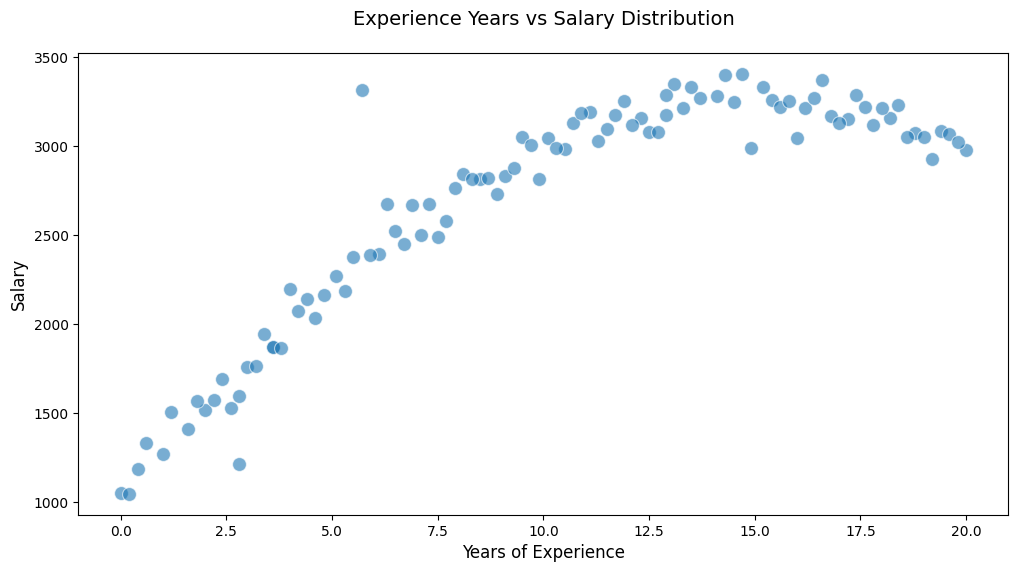

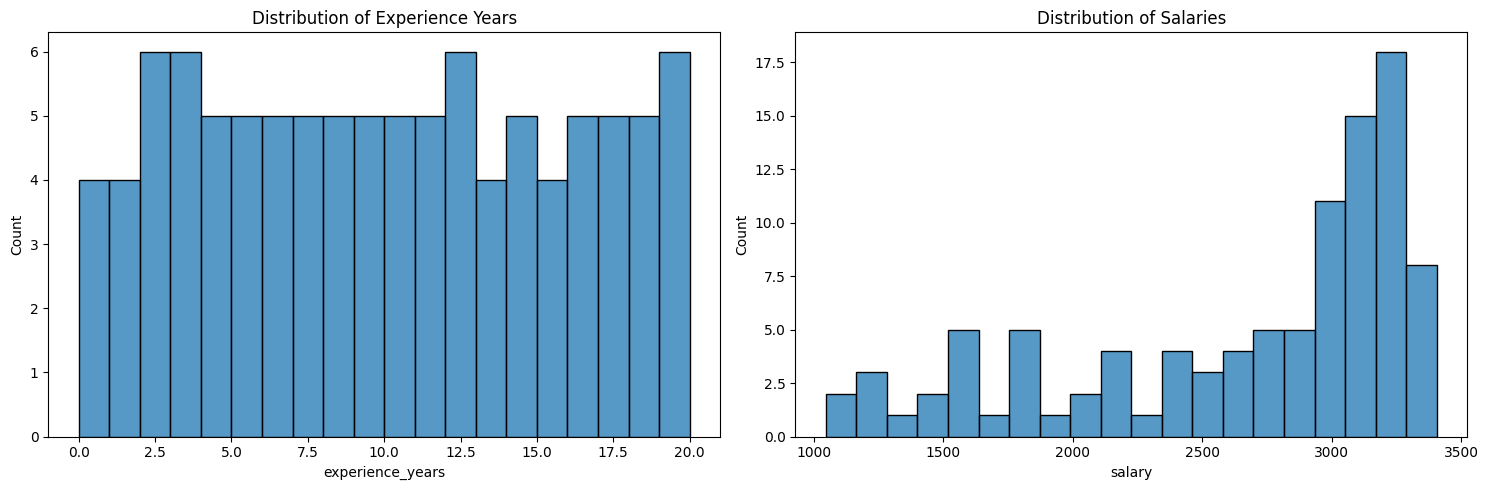

In [16]:
def create_visualizations(data):
    # Scatter plot
    plt.figure(figsize=(12, 6))
    # Check if 'experience_years' is present, otherwise, use the correct column name
    x_col = 'experience_years' if 'experience_years' in data.columns else data.columns[0]
    sns.scatterplot(data=data,
                   x=x_col,  # Use x_col here
                   y='salary',
                   alpha=0.6,
                   s=100)
    plt.title('Experience Years vs Salary Distribution', fontsize=14, pad=20)
    plt.xlabel('Years of Experience', fontsize=12)
    plt.ylabel('Salary', fontsize=12)
    plt.show()

    # Distribution plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data=data, x=x_col, bins=20, ax=ax1)  # Use x_col here
    ax1.set_title('Distribution of Experience Years')

    sns.histplot(data=data, x='salary', bins=20, ax=ax2)
    ax2.set_title('Distribution of Salaries')

    plt.tight_layout()
    plt.show()

create_visualizations(data)

### Data Preparation
Let's prepare our data for modeling:

In [17]:
def prepare_data(data):
    """Prepare data for modeling"""
    # Check for duplicates
    initial_shape = data.shape
    data_clean = data.drop_duplicates()
    final_shape = data_clean.shape

    print(f"Rows removed due to duplication: {initial_shape[0] - final_shape[0]}")

    # Check for missing values
    missing_values = data_clean.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)

    # Prepare features and target
    X = data_clean['experience_years'].values.reshape(-1, 1)
    y = data_clean['salary'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepare_data(data)

Rows removed due to duplication: 1

Missing Values:
employee_id         0
experience_years    0
salary              0
dtype: int64


## 🤖 Model Development

We'll implement three different models:

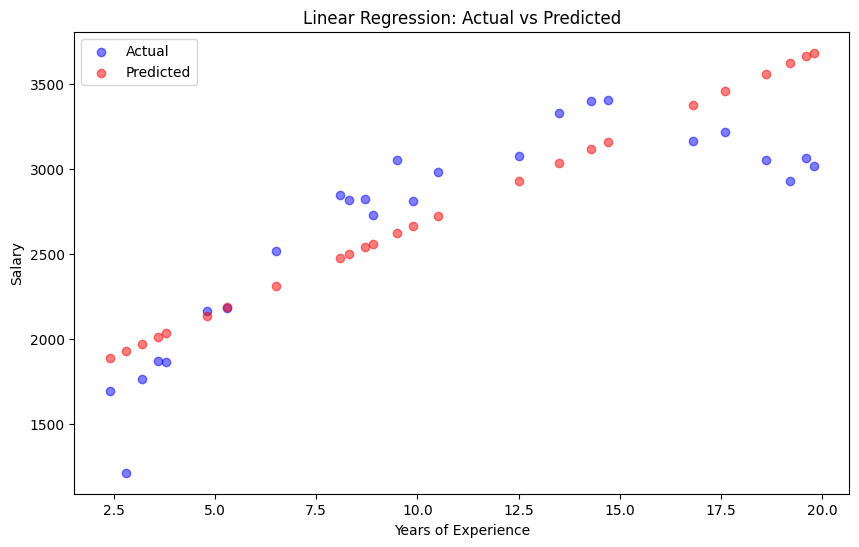

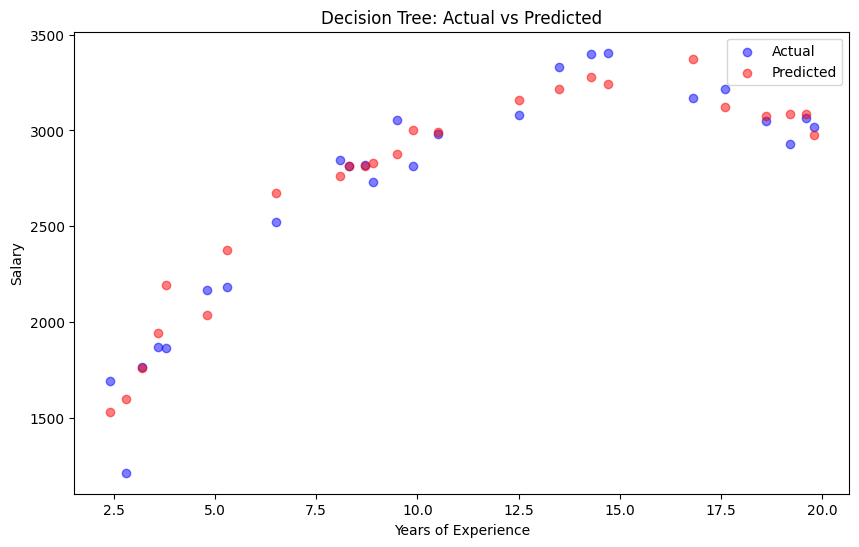

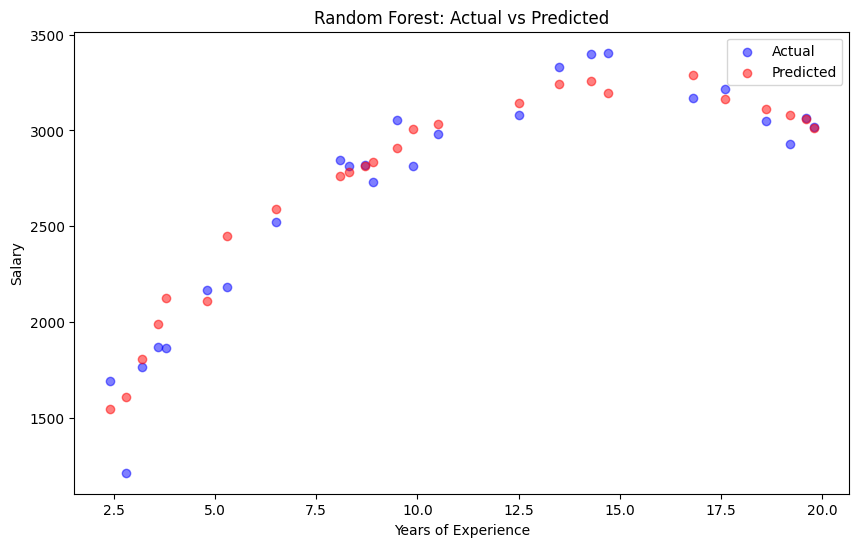

,Model,Train MSE,Test MSE,Train R2,Test R2
0,Linear Regression,107699.85,128111.12,0.77,0.63
1,Decision Tree,88.12,23627.99,1.00,0.93
2,Random Forest,3737.44,21744.73,0.99,0.94


In [18]:
class SalaryPredictor:
    def __init__(self):
        self.models = {}

    def train_models(self, X_train, y_train):
        """Train multiple models"""
        # Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        self.models['Linear Regression'] = lr_model

        # Decision Tree
        dt_model = DecisionTreeRegressor(random_state=42)
        dt_model.fit(X_train, y_train)
        self.models['Decision Tree'] = dt_model

        # Random Forest
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train, y_train)
        self.models['Random Forest'] = rf_model

    def evaluate_models(self, X_train, X_test, y_train, y_test):
        """Evaluate and compare model performances"""
        results = []

        for name, model in self.models.items():
            # Make predictions
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)

            # Calculate metrics
            train_mse = mean_squared_error(y_train, train_pred)
            test_mse = mean_squared_error(y_test, test_pred)
            train_r2 = r2_score(y_train, train_pred)
            test_r2 = r2_score(y_test, test_pred)

            results.append({
                'Model': name,
                'Train MSE': train_mse,
                'Test MSE': test_mse,
                'Train R2': train_r2,
                'Test R2': test_r2
            })

            # Visualize predictions
            plt.figure(figsize=(10, 6))
            plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
            plt.scatter(X_test, test_pred, color='red', label='Predicted', alpha=0.5)
            plt.title(f'{name}: Actual vs Predicted')
            plt.xlabel('Years of Experience')
            plt.ylabel('Salary')
            plt.legend()
            plt.show()

        return pd.DataFrame(results)

# Train and evaluate models
predictor = SalaryPredictor()
predictor.train_models(X_train, y_train)
results_df = predictor.evaluate_models(X_train, X_test, y_train, y_test)
display(results_df.round(2))

## 📈 Model Evaluation

Let's create a function to make predictions:

In [19]:
def make_predictions(predictor, experience_years):
    """Make predictions using all models"""
    experience = np.array([[experience_years]])
    predictions = {}

    for name, model in predictor.models.items():
        predictions[name] = model.predict(experience)[0]

    return predictions

# Example prediction
experience = 5
predictions = make_predictions(predictor, experience)
print(f"\nPredicted salaries for {experience} years of experience:")
for model, prediction in predictions.items():
    print(f"{model}: ${prediction:,.2f}")


Predicted salaries for 5 years of experience:
Linear Regression: $2,157.35
Decision Tree: $2,271.20
Random Forest: $2,238.49
